In [1]:
import os
os.chdir('../')

from visualization import Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
project = 'rehersal Alexnet MNIST Task IL CL'

UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'contrastive_learning_rate', 'optimizer']
viz = Visualization(project=project, UID=UID)

In [32]:
viz.extract_all_runs_metrics_after_task_3()

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def box_plot(metric_name, df, filename=None, fontsize=20):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    labels = [f"{uid.split(';')[0]} {uid.split(';')[5]} {uid.split(';')[6]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)  # Add this line to set the font size of the y-axis
    plt.title(f"metric: {metric_name}", fontsize=fontsize)
    plt.xlabel("unique identifier", fontsize=fontsize)
    plt.ylabel("accuracy [%]", fontsize=fontsize)

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf', bbox_inches='tight')
        plt.savefig("images/"+filename+".svg", format='svg', bbox_inches='tight')

In [37]:
df.UID

0        stat-wmm;128;True;0.001;5;1e-06;SGD;
1        stat-wmm;128;True;0.001;5;1e-05;SGD;
2        stat-wmm;128;True;0.001;5;1e-07;SGD;
3       stat-wmm;128;False;0.001;5;0.001;SGD;
4      stat-wmm;128;False;0.001;5;0.0001;SGD;
5       stat-wmm;128;False;0.001;5;1e-05;SGD;
6       stat-wmm;128;False;0.001;5;1e-06;SGD;
7       stat-wmm;128;False;0.001;5;1e-07;SGD;
8      stat-wmm;128;False;0.001;5;1e-07;Adam;
9      stat-wmm;128;False;0.001;5;1e-06;Adam;
10     stat-wmm;128;False;0.001;5;1e-05;Adam;
11    stat-wmm;128;False;0.001;5;0.0001;Adam;
12     stat-wmm;128;False;0.001;5;0.001;Adam;
13             ;128;False;0.001;5;0.001;Adam;
14            ;128;False;0.001;5;0.0001;Adam;
15             ;128;False;0.001;5;1e-05;Adam;
16             ;128;False;0.001;5;1e-06;Adam;
17             ;128;False;0.001;5;1e-07;Adam;
18             ;128;False;0.001;5;1e-08;Adam;
19              ;128;False;0.001;5;1e-08;SGD;
20              ;128;False;0.001;5;1e-07;SGD;
21              ;128;False;0.001;5

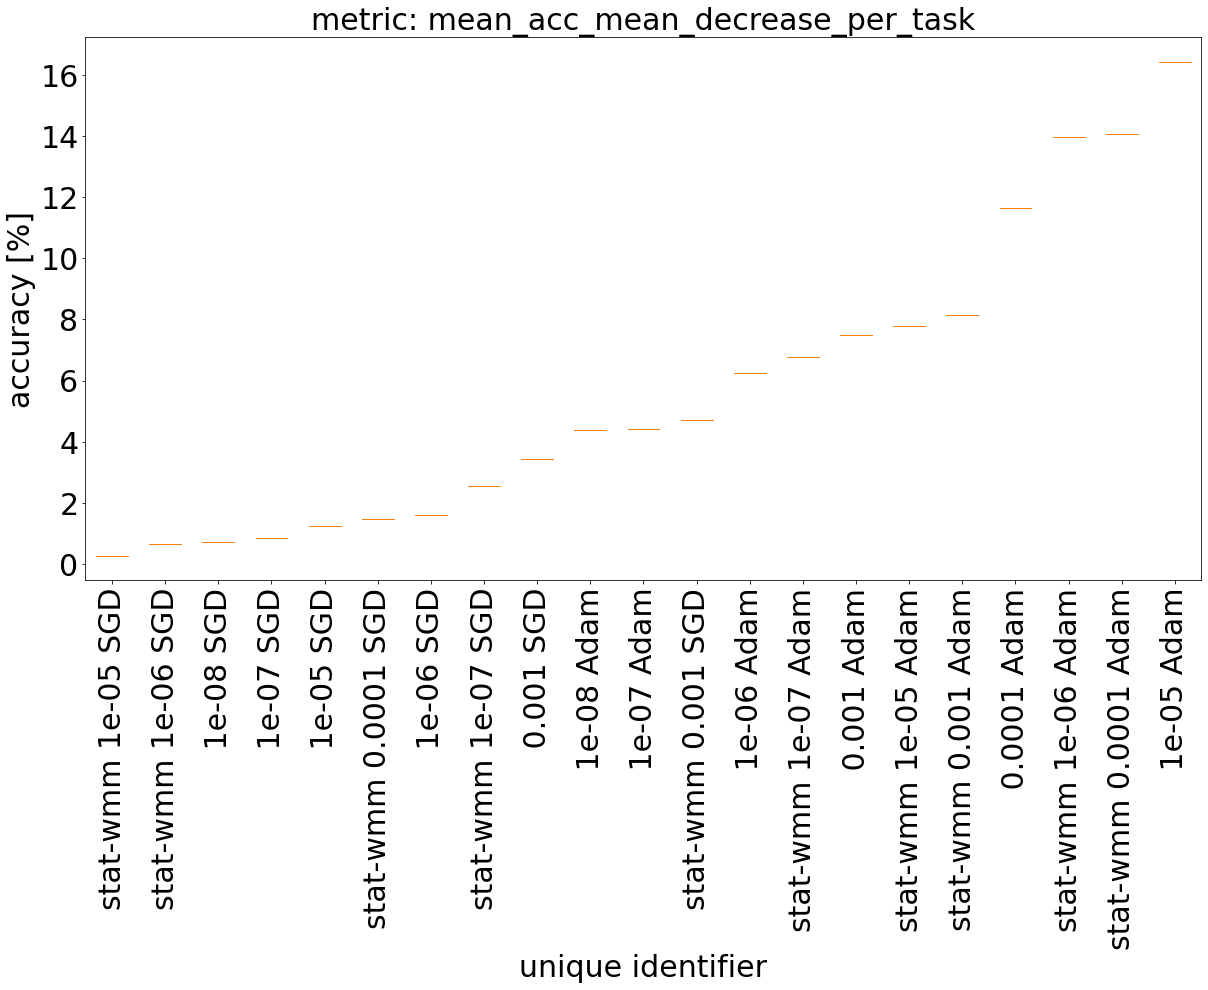

In [61]:
df = viz.metrics_df.iloc[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]]

df = df[df['pretraining'] == 'False']

metric = 'mean_acc_at_the_end'
metric = 'mean_acc_max'
metric = 'mean_acc_mean_decrease_per_task'
# metric = 'acc_at_the_end_task_0'

box_plot(metric, df, "Con_loss_alexnet_optimizer_decrease", fontsize=30)
# box_plot(metric, df, None, fontsize=30)

In [43]:
viz.df.UID

0        stat-wmm;128;True;0.001;5;1e-06;SGD;
1        stat-wmm;128;True;0.001;5;1e-05;SGD;
2        stat-wmm;128;True;0.001;5;1e-07;SGD;
3       stat-wmm;128;False;0.001;5;0.001;SGD;
4      stat-wmm;128;False;0.001;5;0.0001;SGD;
5       stat-wmm;128;False;0.001;5;1e-05;SGD;
6       stat-wmm;128;False;0.001;5;1e-06;SGD;
7       stat-wmm;128;False;0.001;5;1e-07;SGD;
8      stat-wmm;128;False;0.001;5;1e-07;Adam;
9      stat-wmm;128;False;0.001;5;1e-06;Adam;
10     stat-wmm;128;False;0.001;5;1e-05;Adam;
11    stat-wmm;128;False;0.001;5;0.0001;Adam;
12     stat-wmm;128;False;0.001;5;0.001;Adam;
13             ;128;False;0.001;5;0.001;Adam;
14            ;128;False;0.001;5;0.0001;Adam;
15             ;128;False;0.001;5;1e-05;Adam;
16             ;128;False;0.001;5;1e-06;Adam;
17             ;128;False;0.001;5;1e-07;Adam;
18             ;128;False;0.001;5;1e-08;Adam;
19              ;128;False;0.001;5;1e-08;SGD;
20              ;128;False;0.001;5;1e-07;SGD;
21              ;128;False;0.001;5

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           90.30 &     87.91 &               0.07 &  test \\
    1 &           89.80 &     88.98 &               0.20 &  test \\
    2 &           75.90 &     76.86 &               2.15 &  test \\
    3 &           85.55 &     85.34 &               3.85 &  test \\
    4 &           87.95 &     84.61 &               0.00 &  test \\
\bottomrule
\end{tabular}



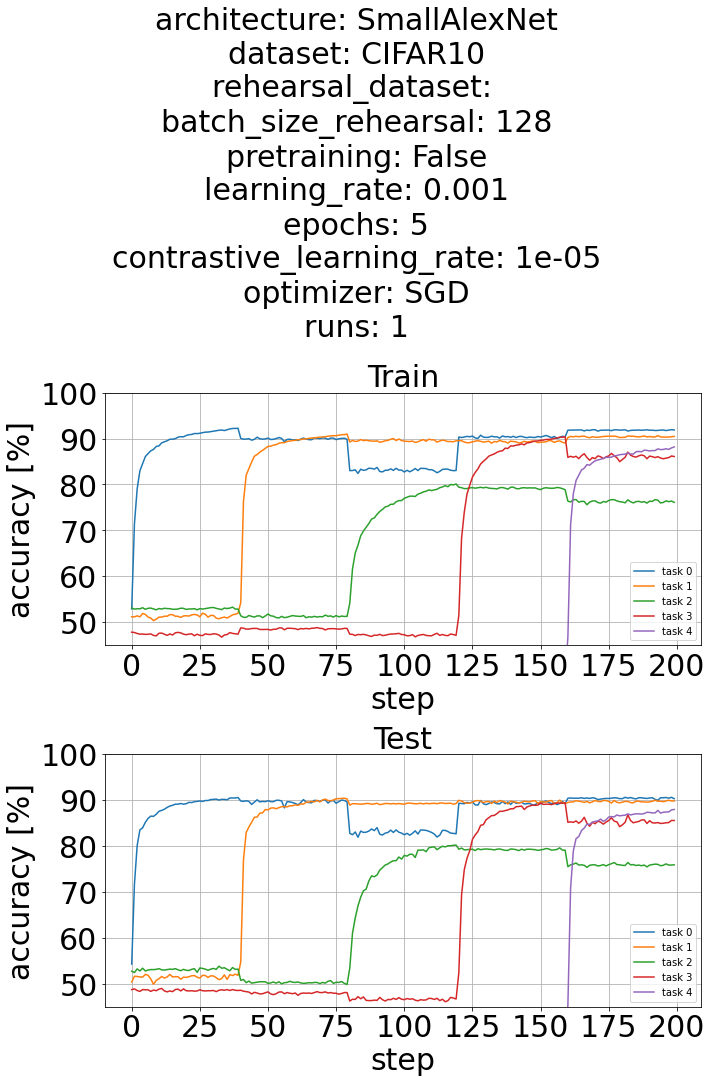

In [51]:
viz.plot_single_setting_aggregated(';128;False;0.001;5;1e-05;SGD', layout='vertical_short', fontsize=30, filename='con_loss_sgd')

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           58.10 &     64.11 &               6.33 &  test \\
    1 &           50.00 &     60.72 &              14.18 &  test \\
    2 &           51.20 &     64.42 &              20.45 &  test \\
    3 &           50.00 &     69.81 &              41.20 &  test \\
    4 &           95.55 &     93.92 &               0.00 &  test \\
\bottomrule
\end{tabular}



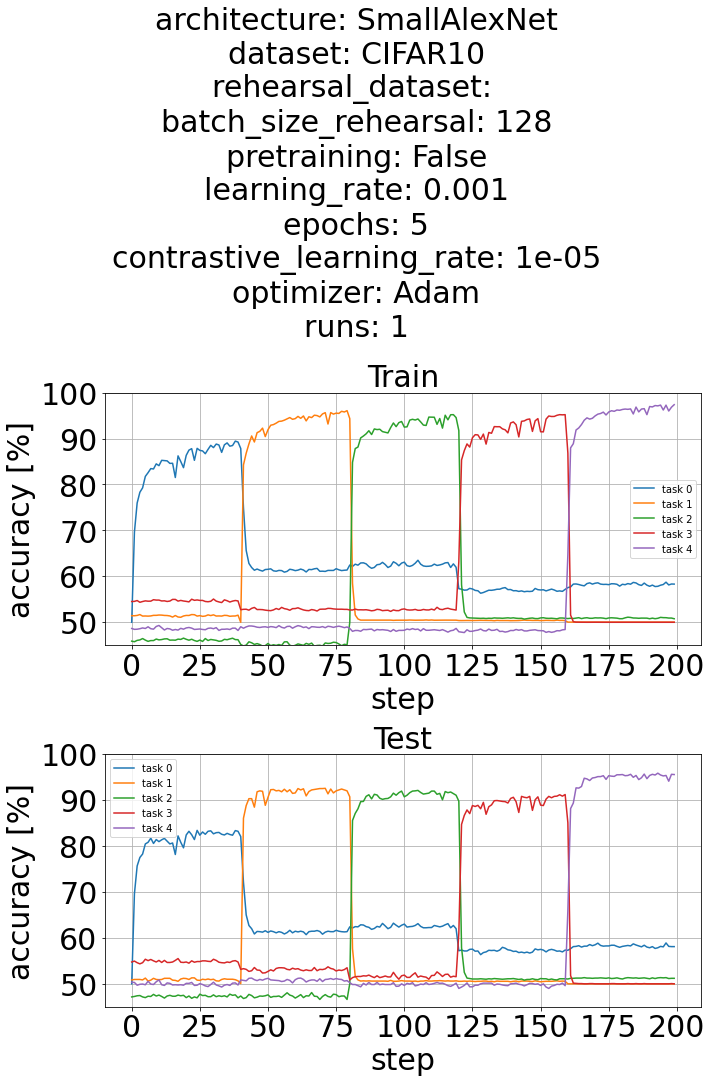

In [52]:
viz.plot_single_setting_aggregated(';128;False;0.001;5;1e-05;Adam', layout='vertical_short', fontsize=30, filename='con_loss_adam')

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:315: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(2, 2, tight_layout=True)


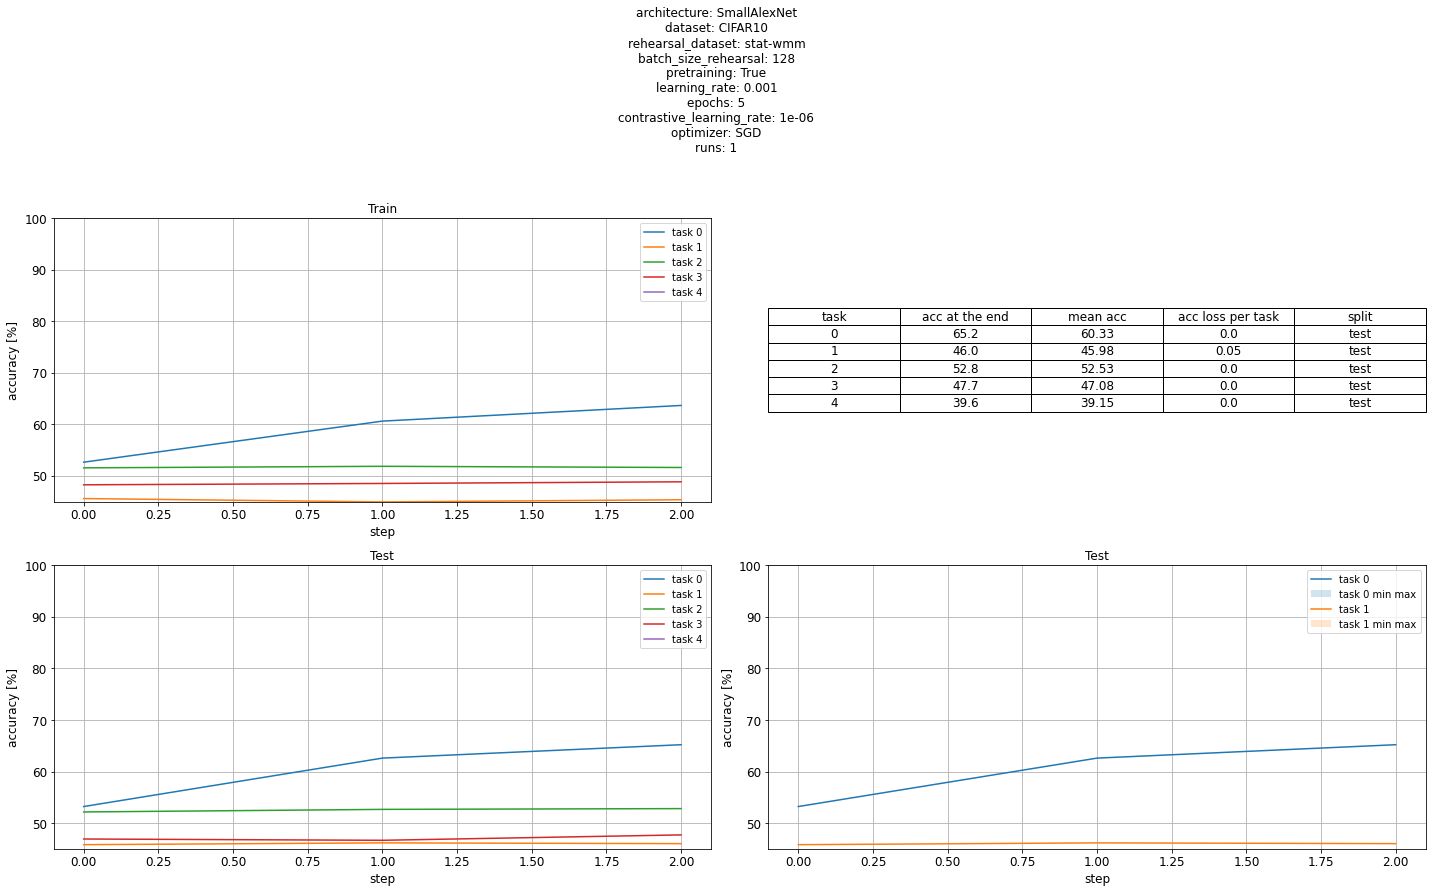

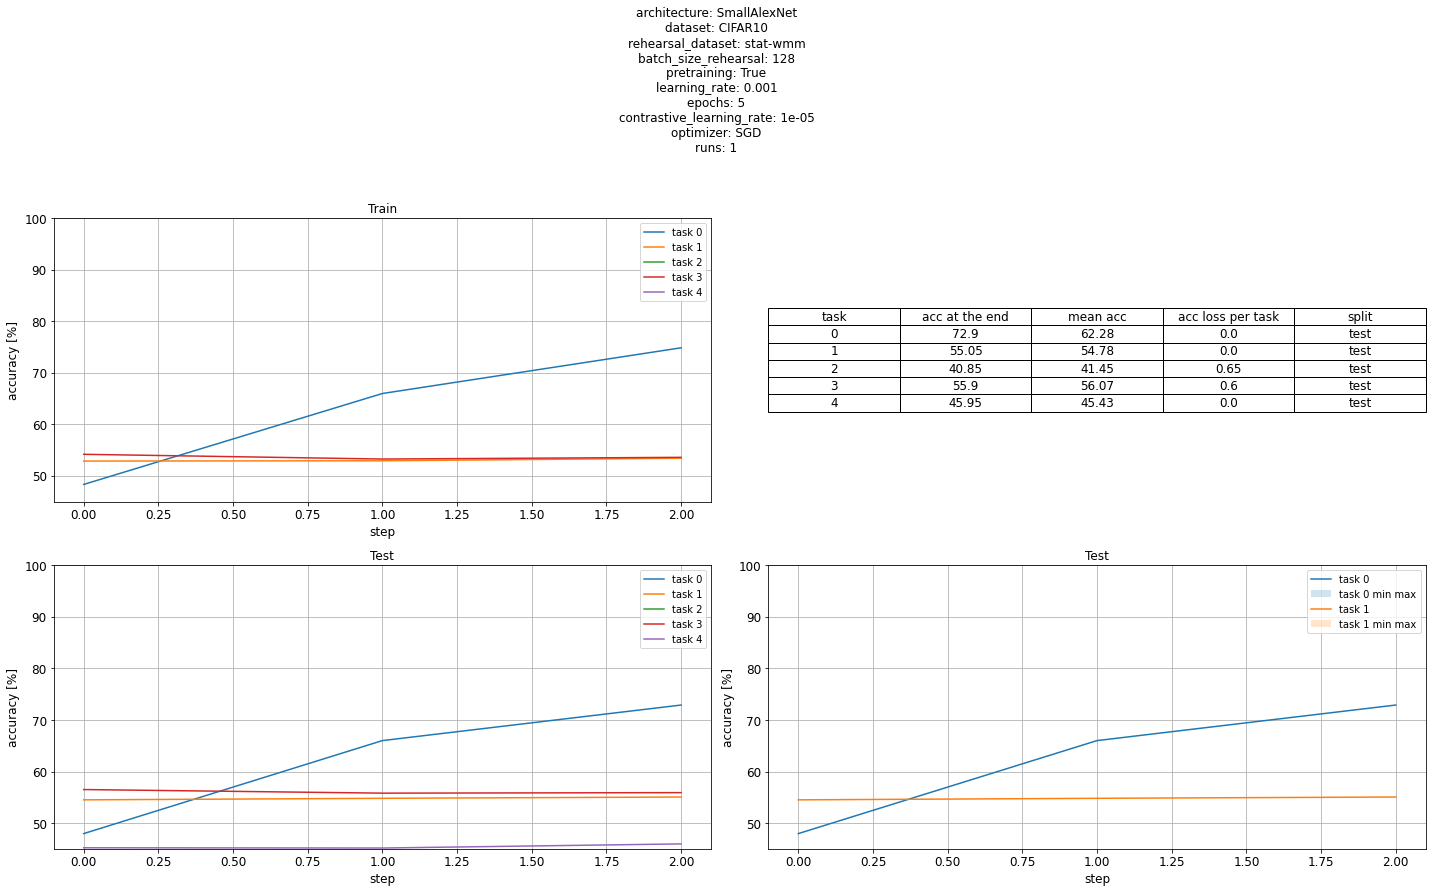

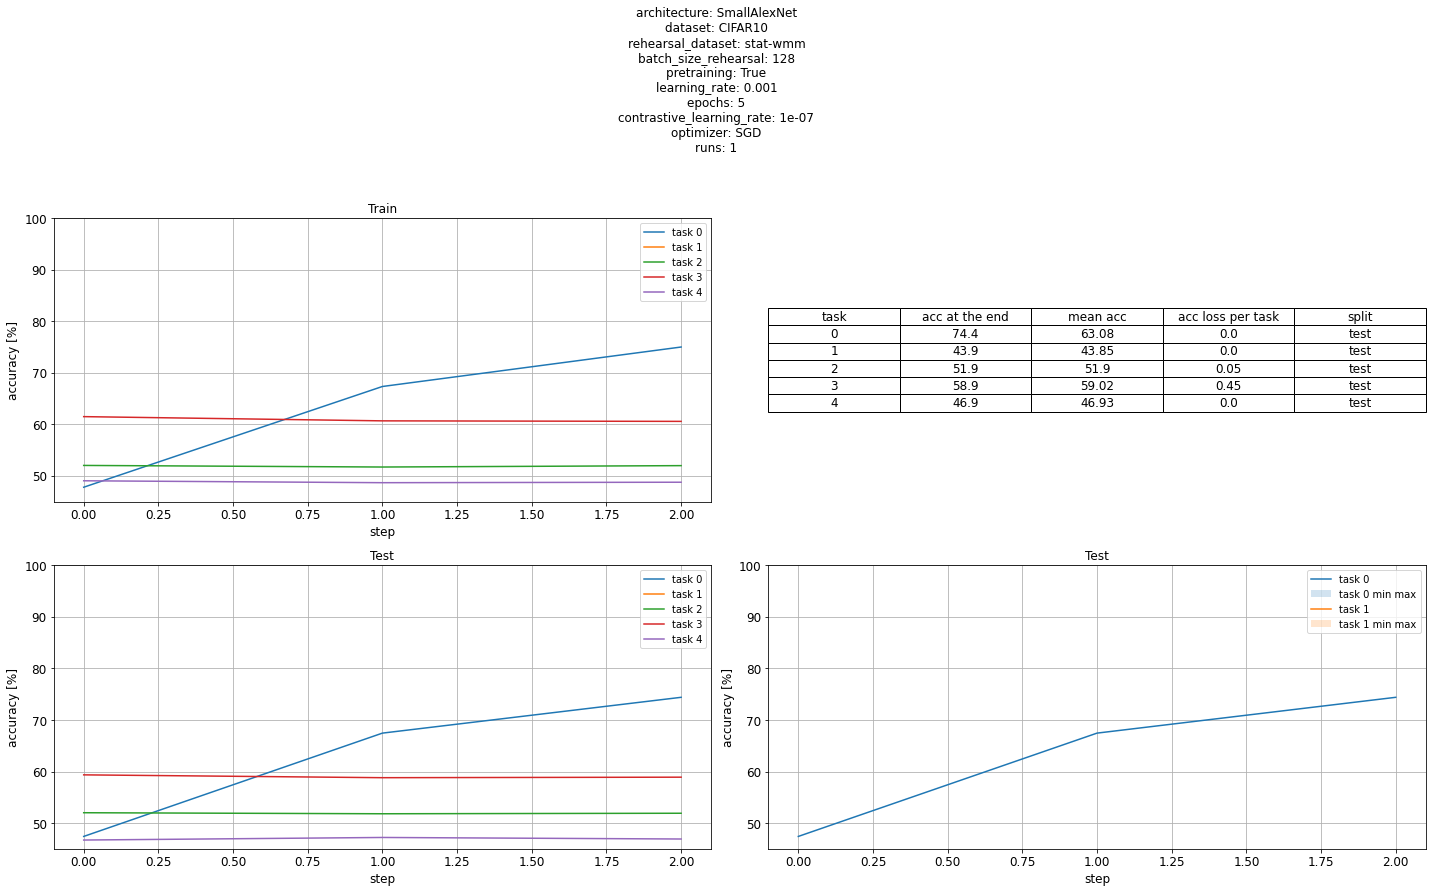

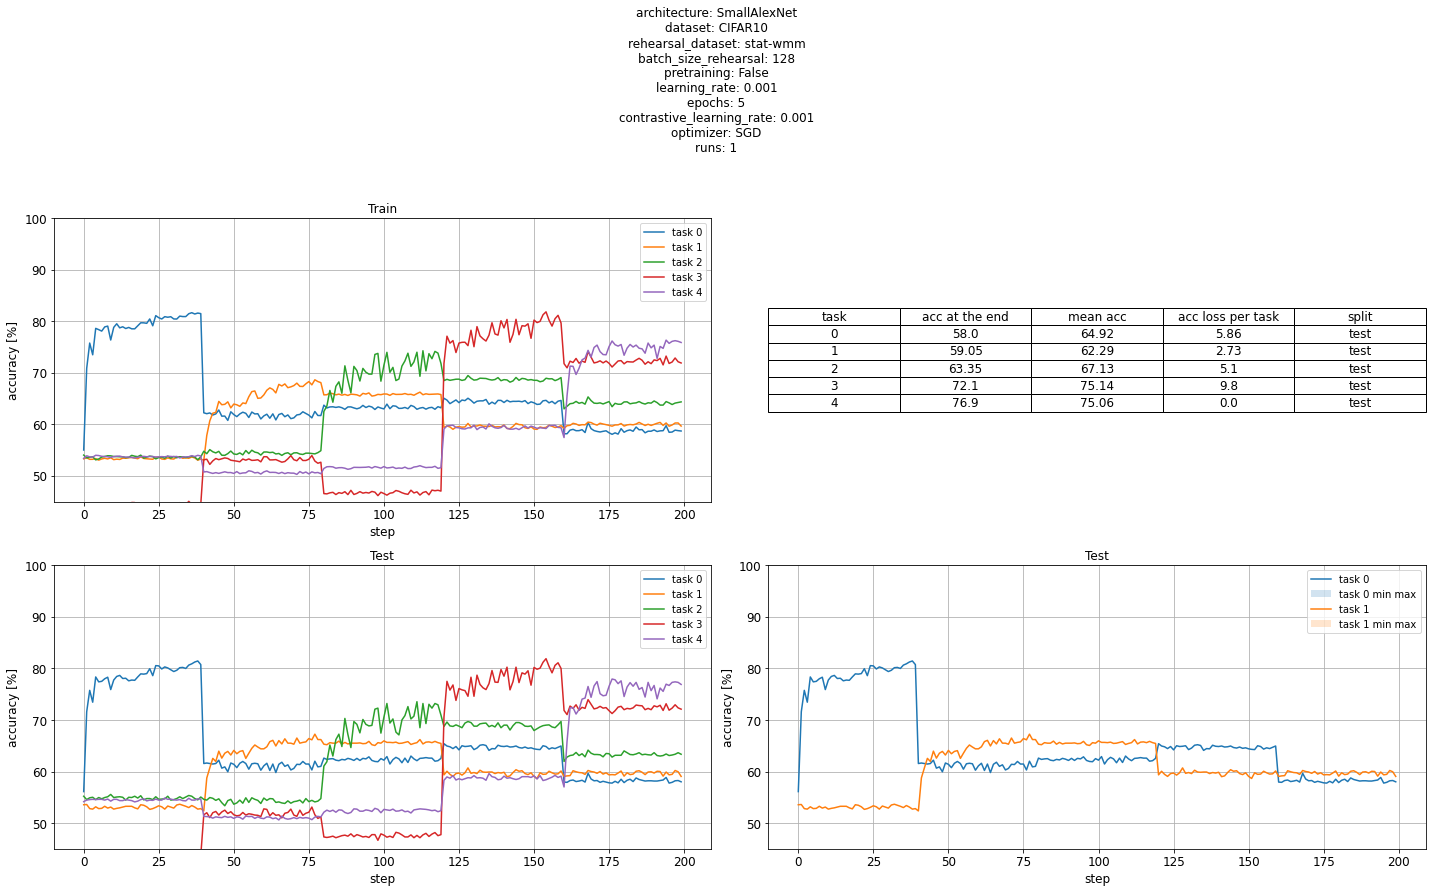

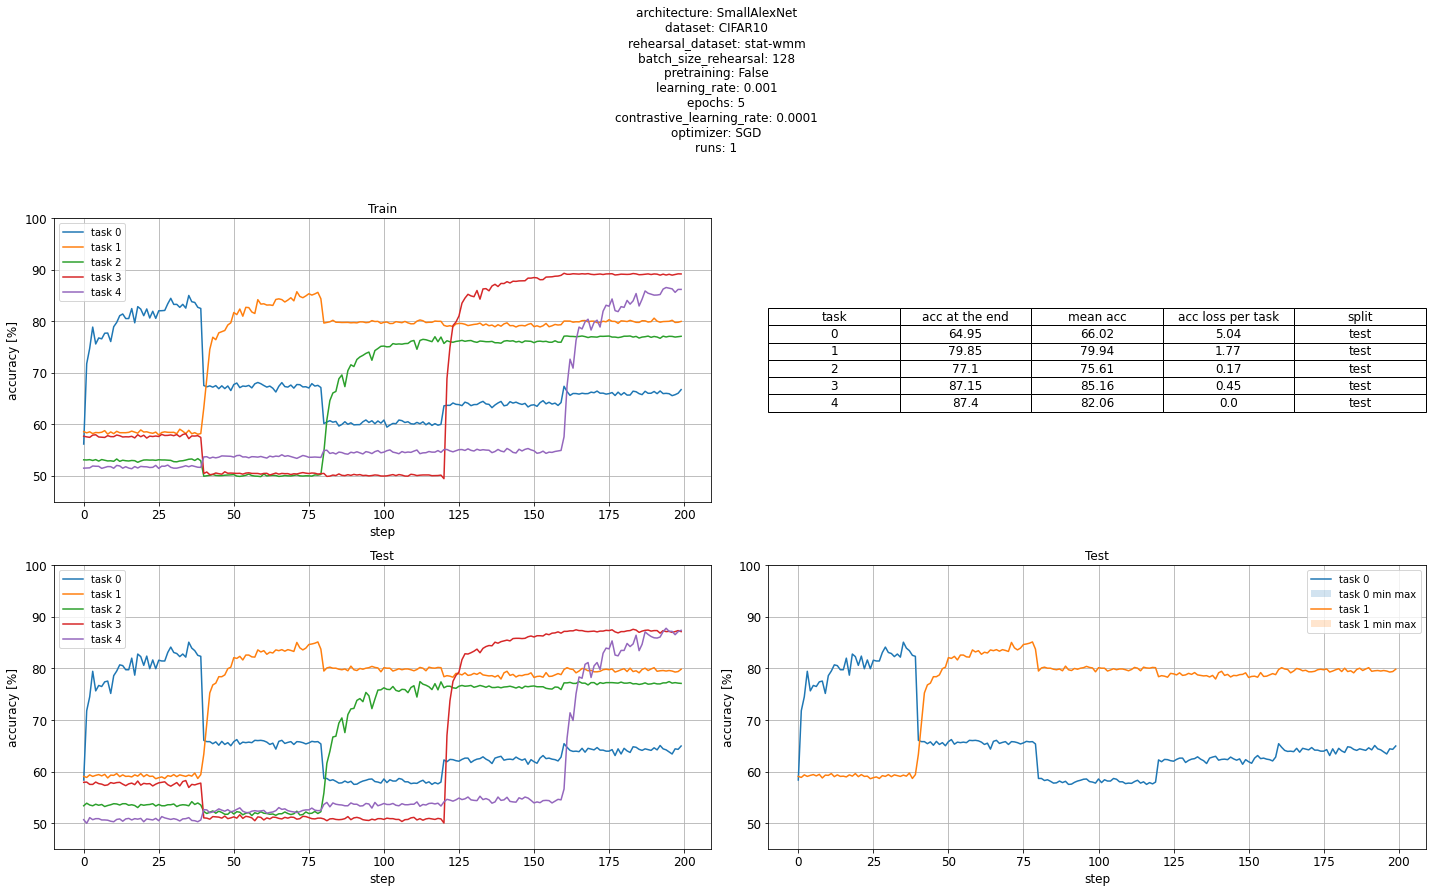

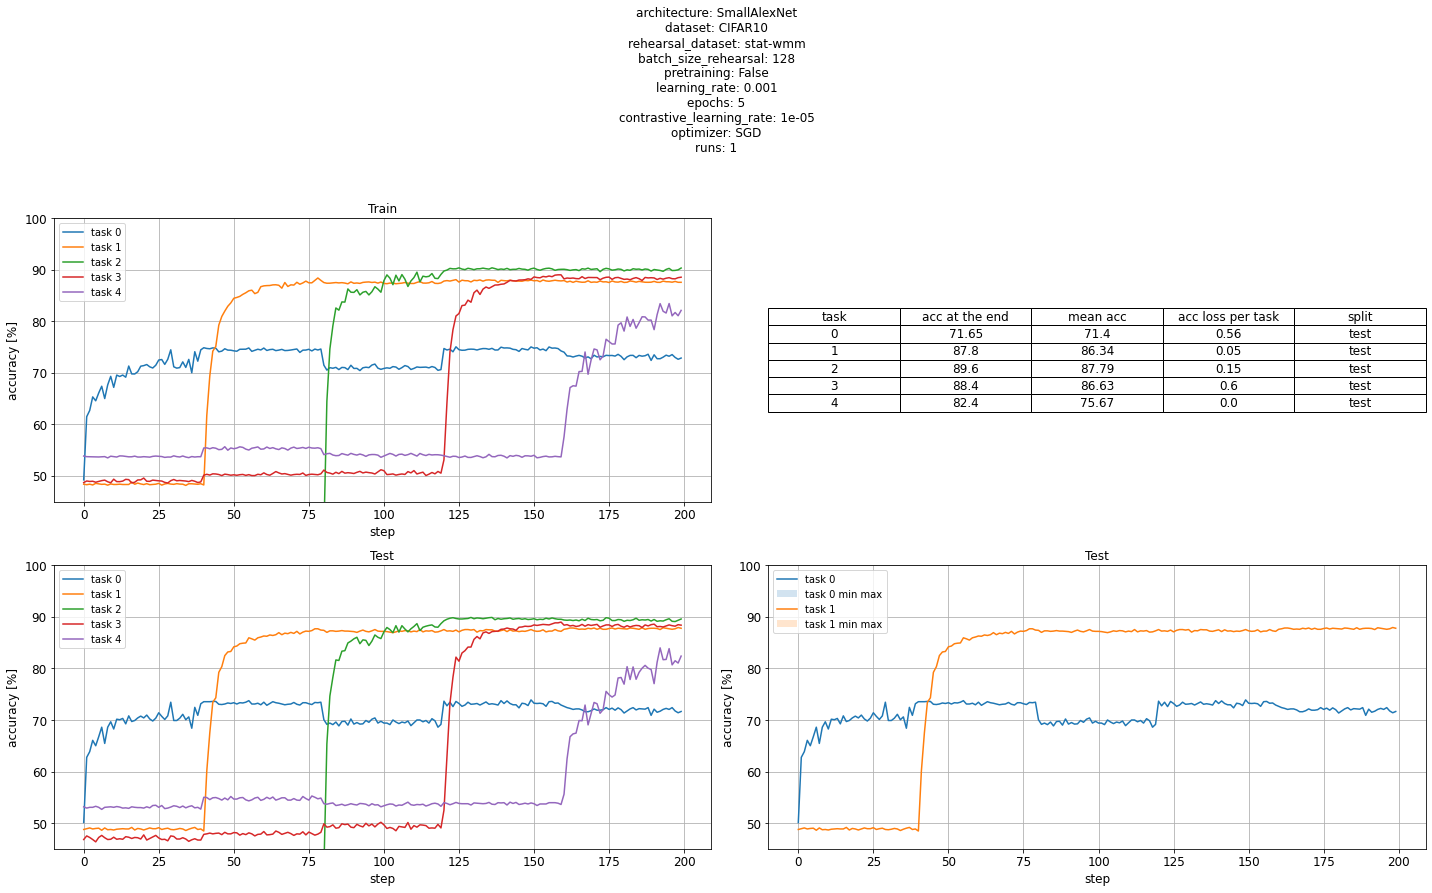

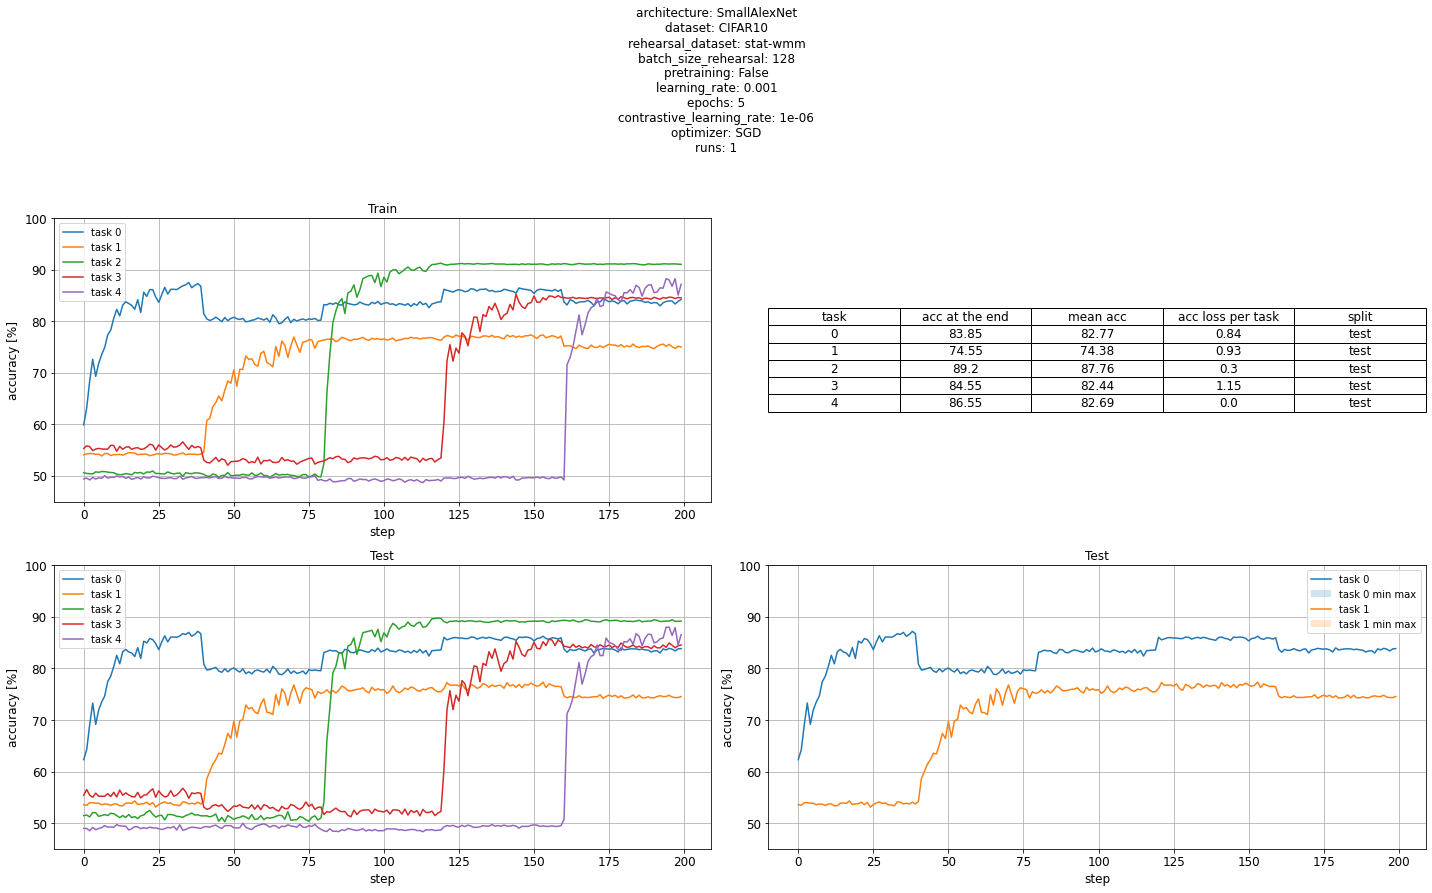

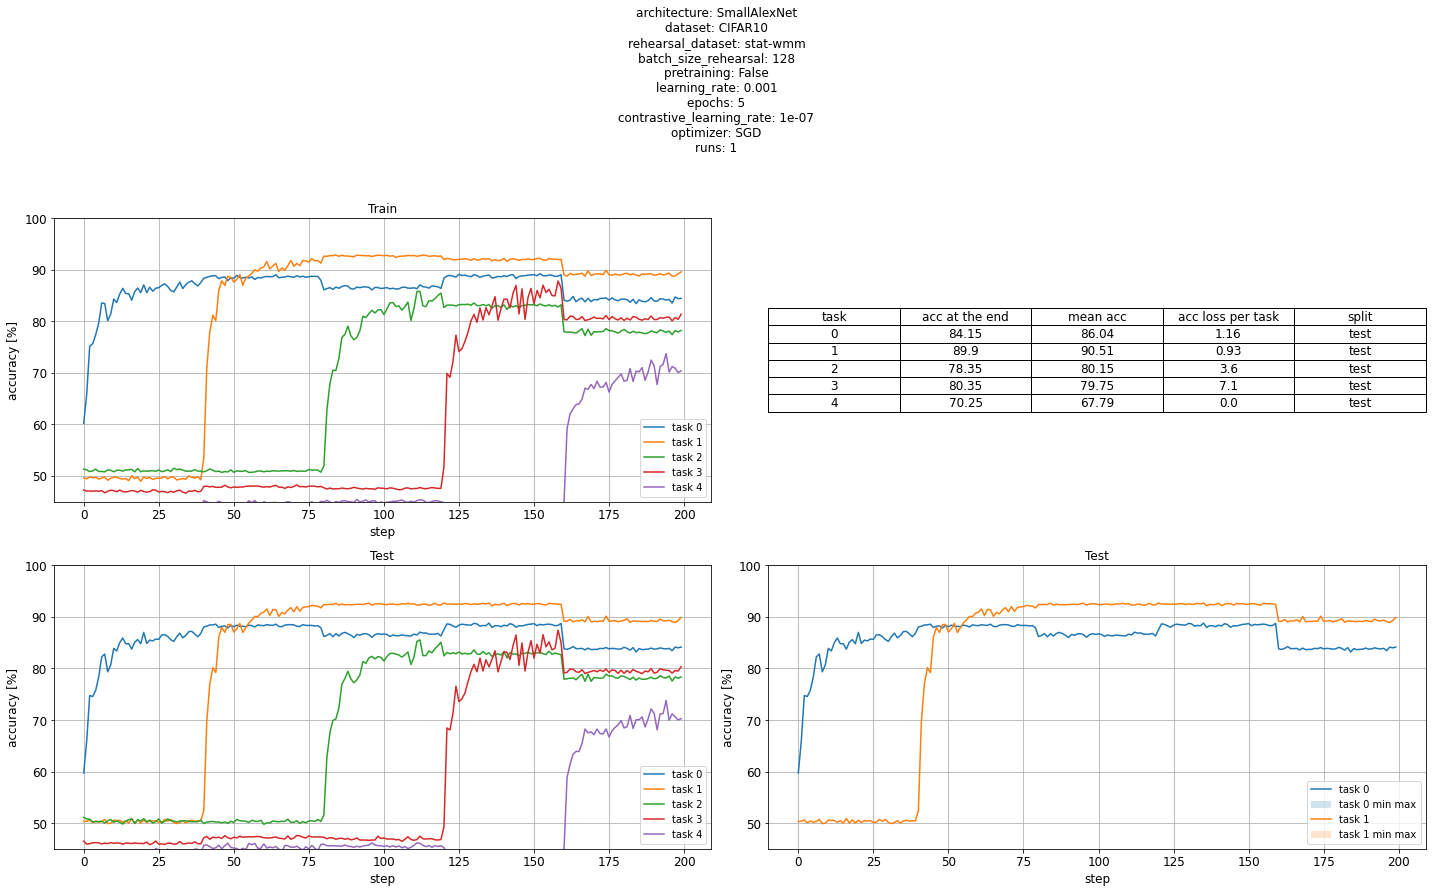

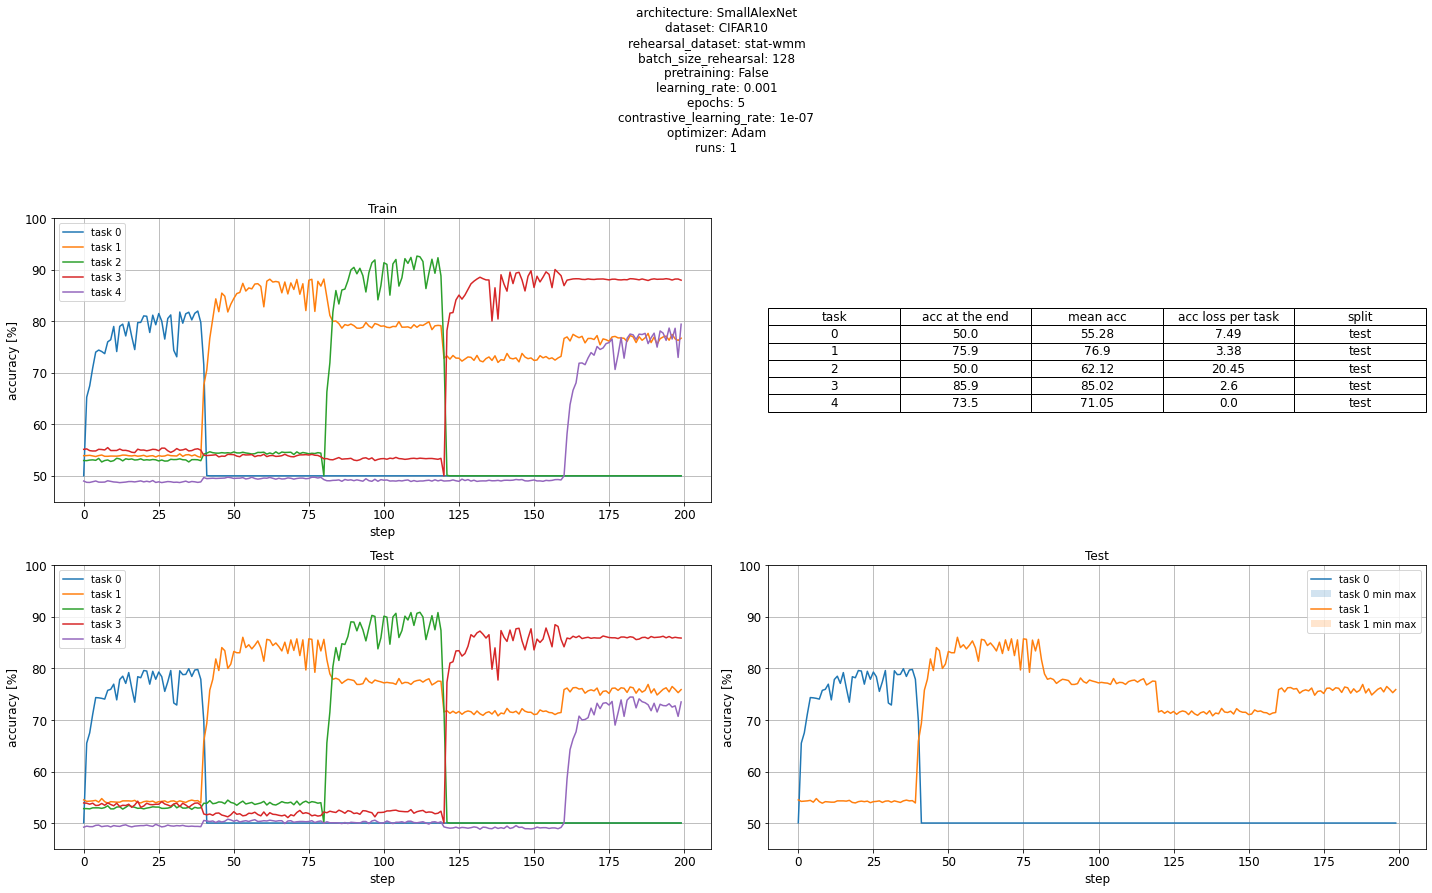

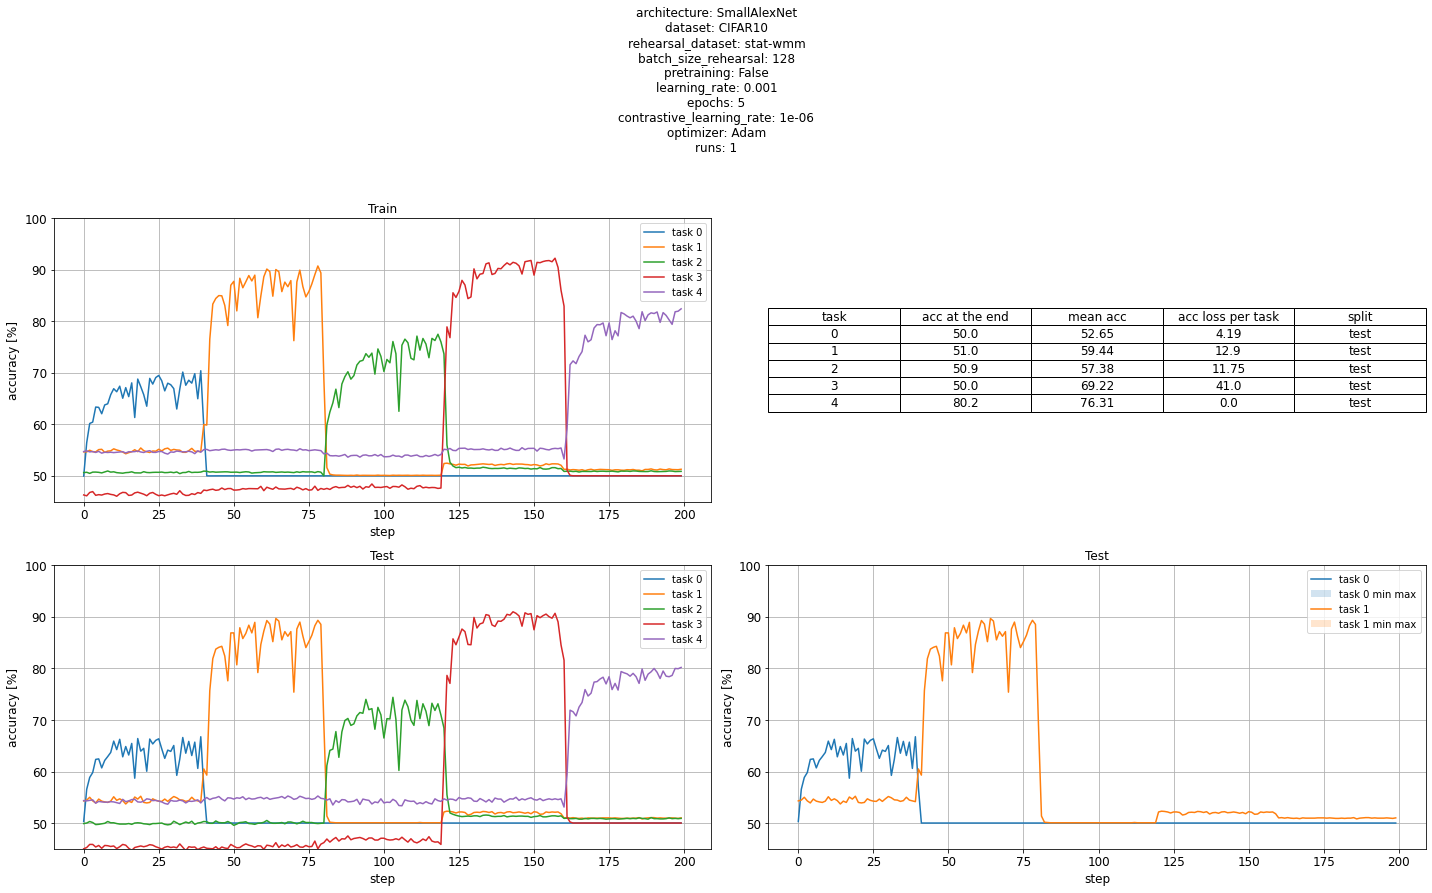

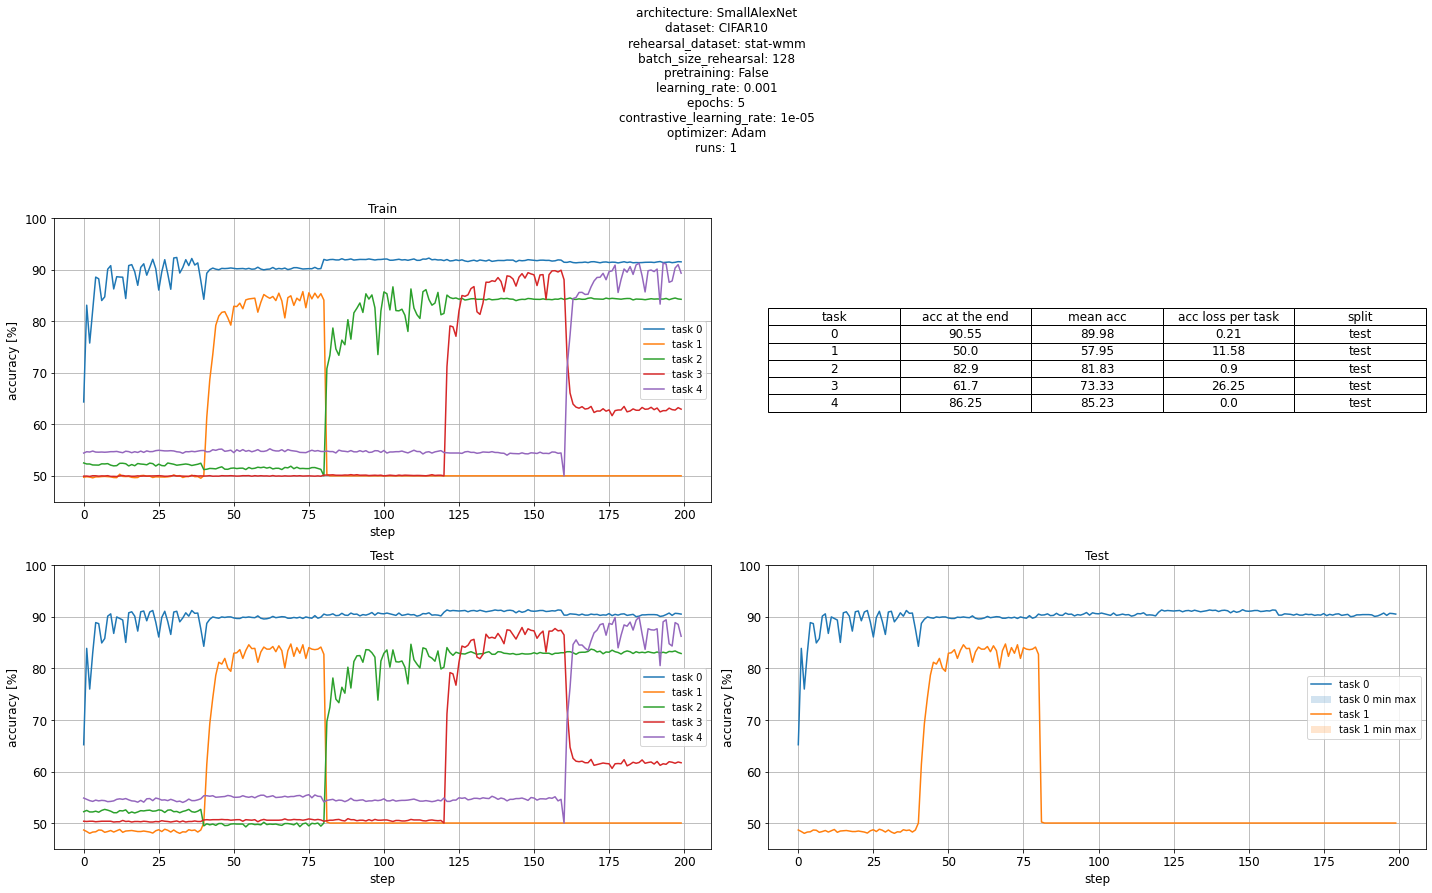

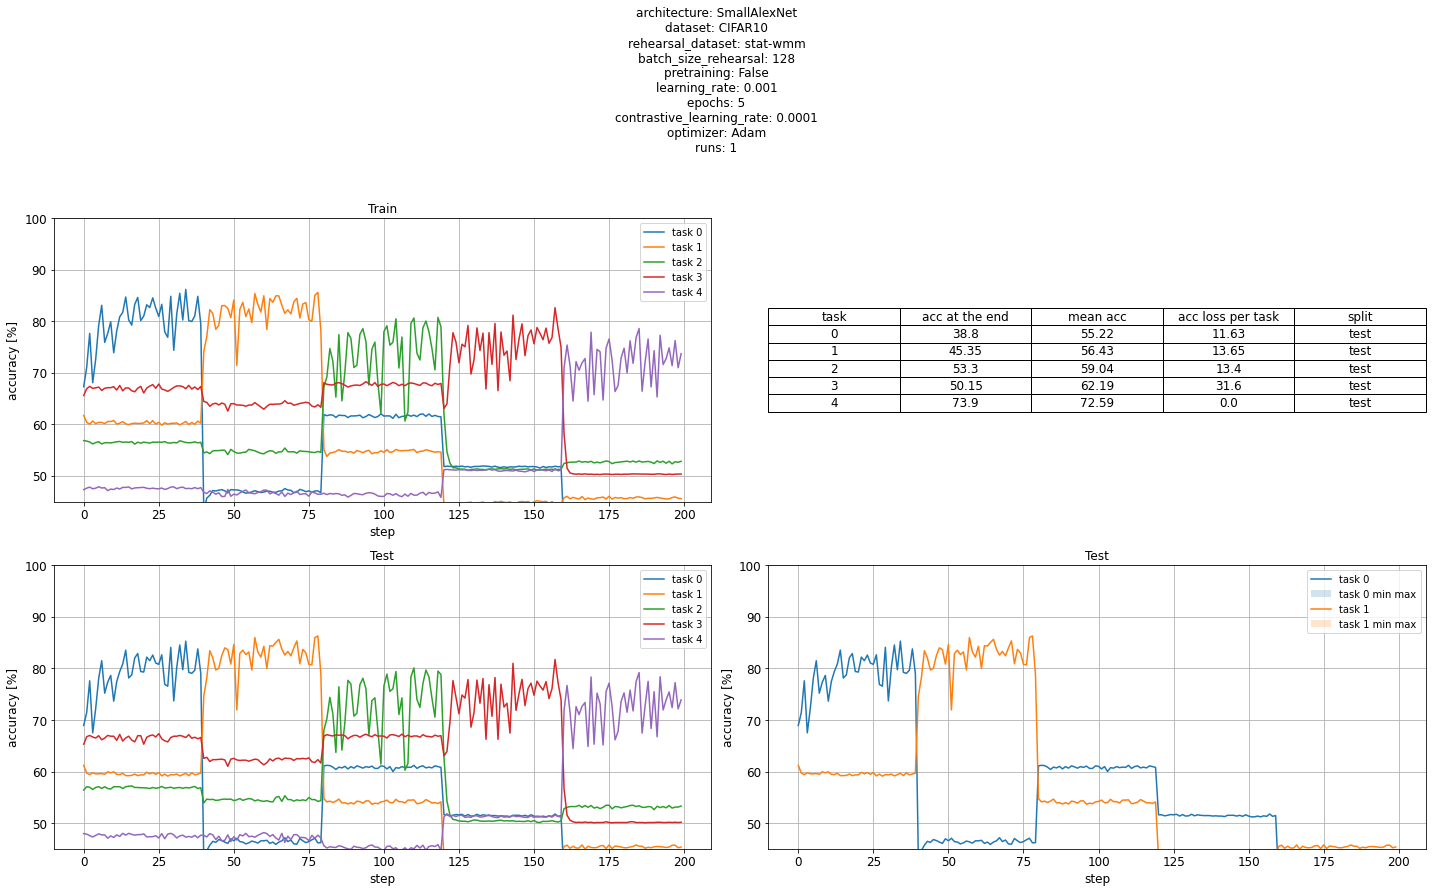

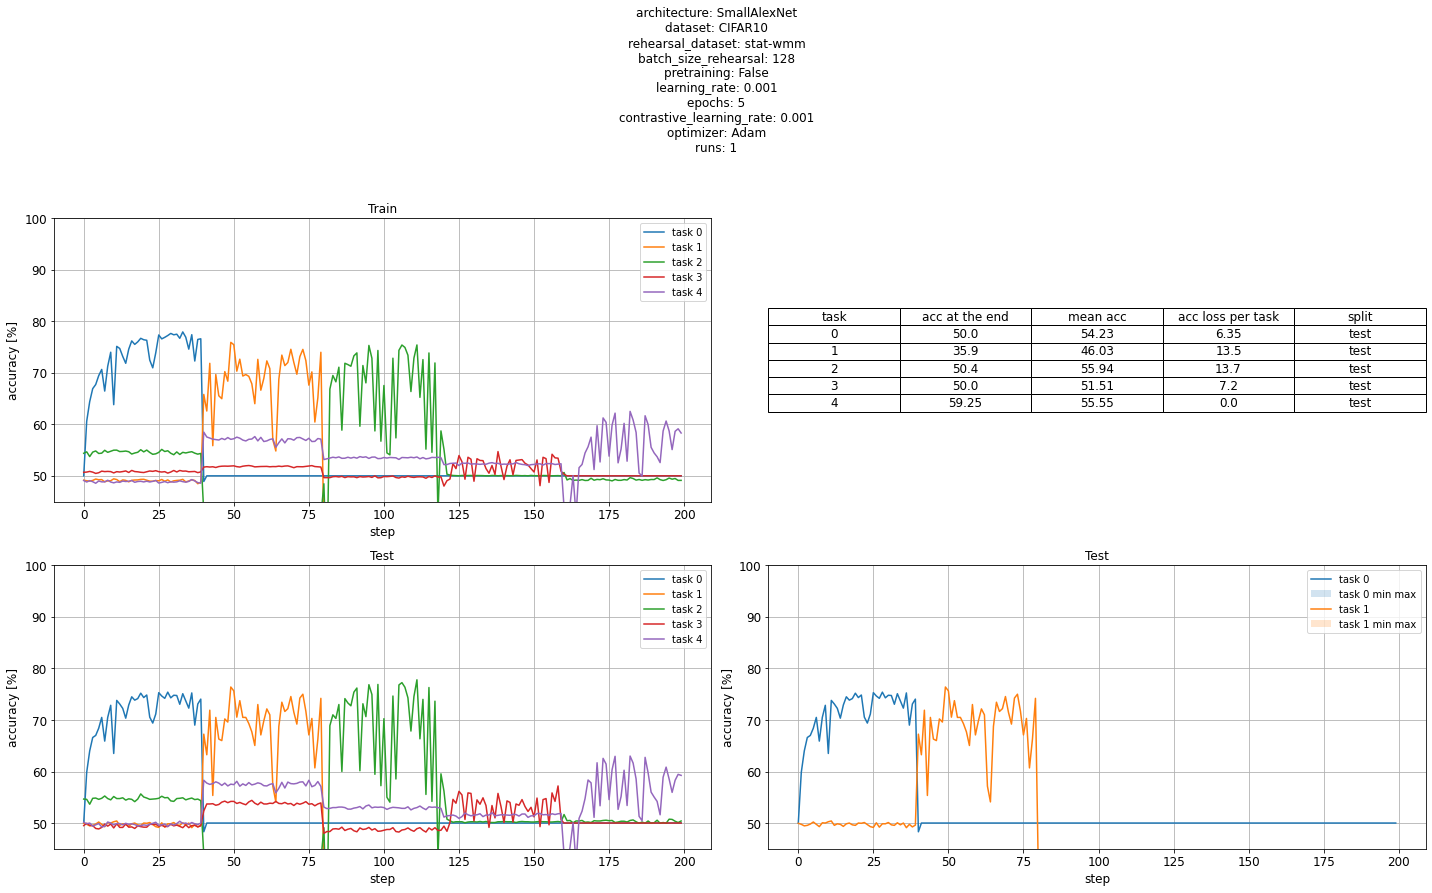

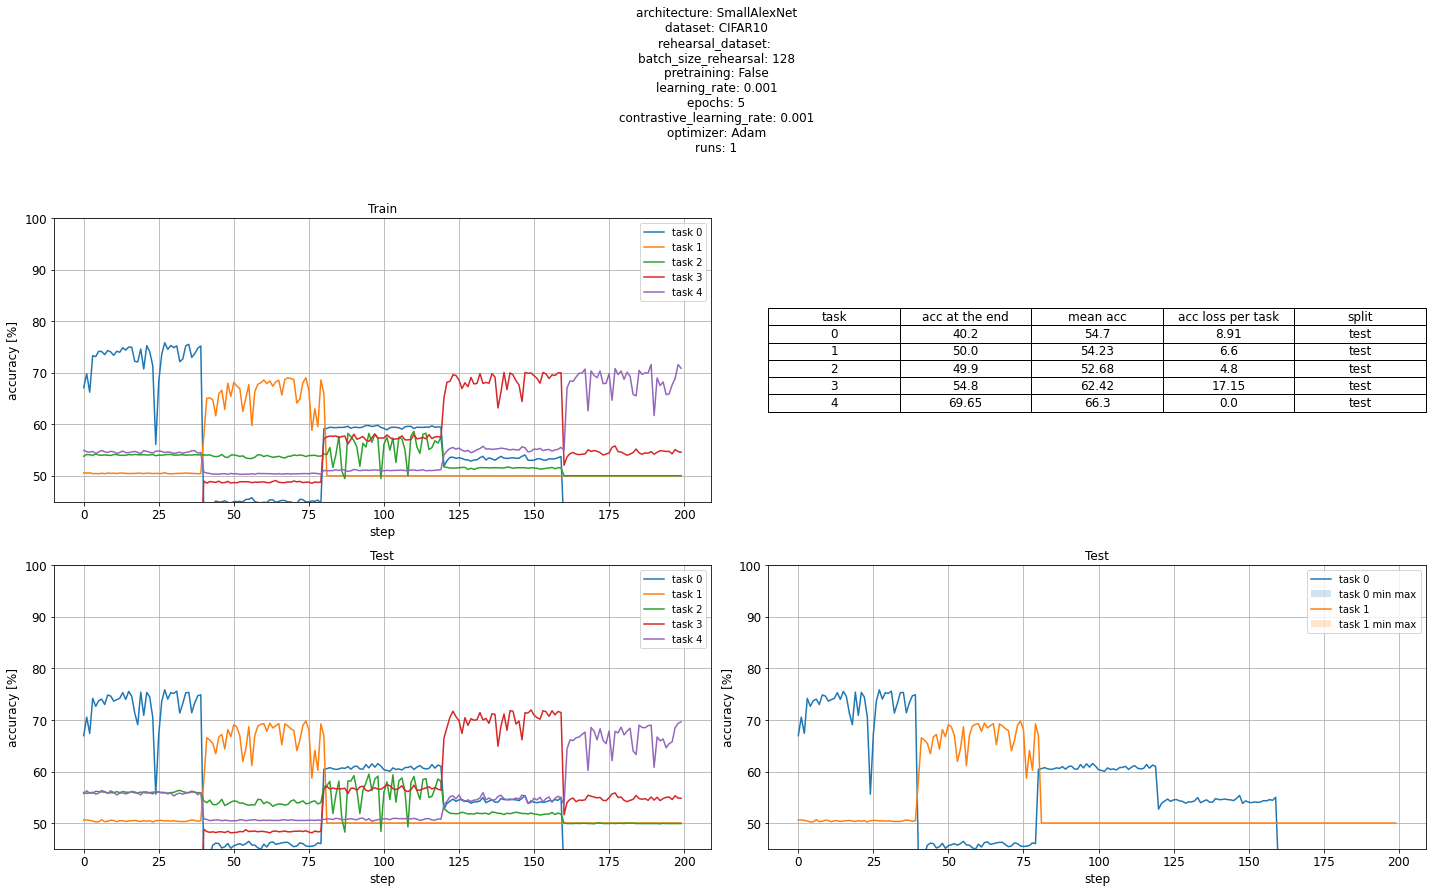

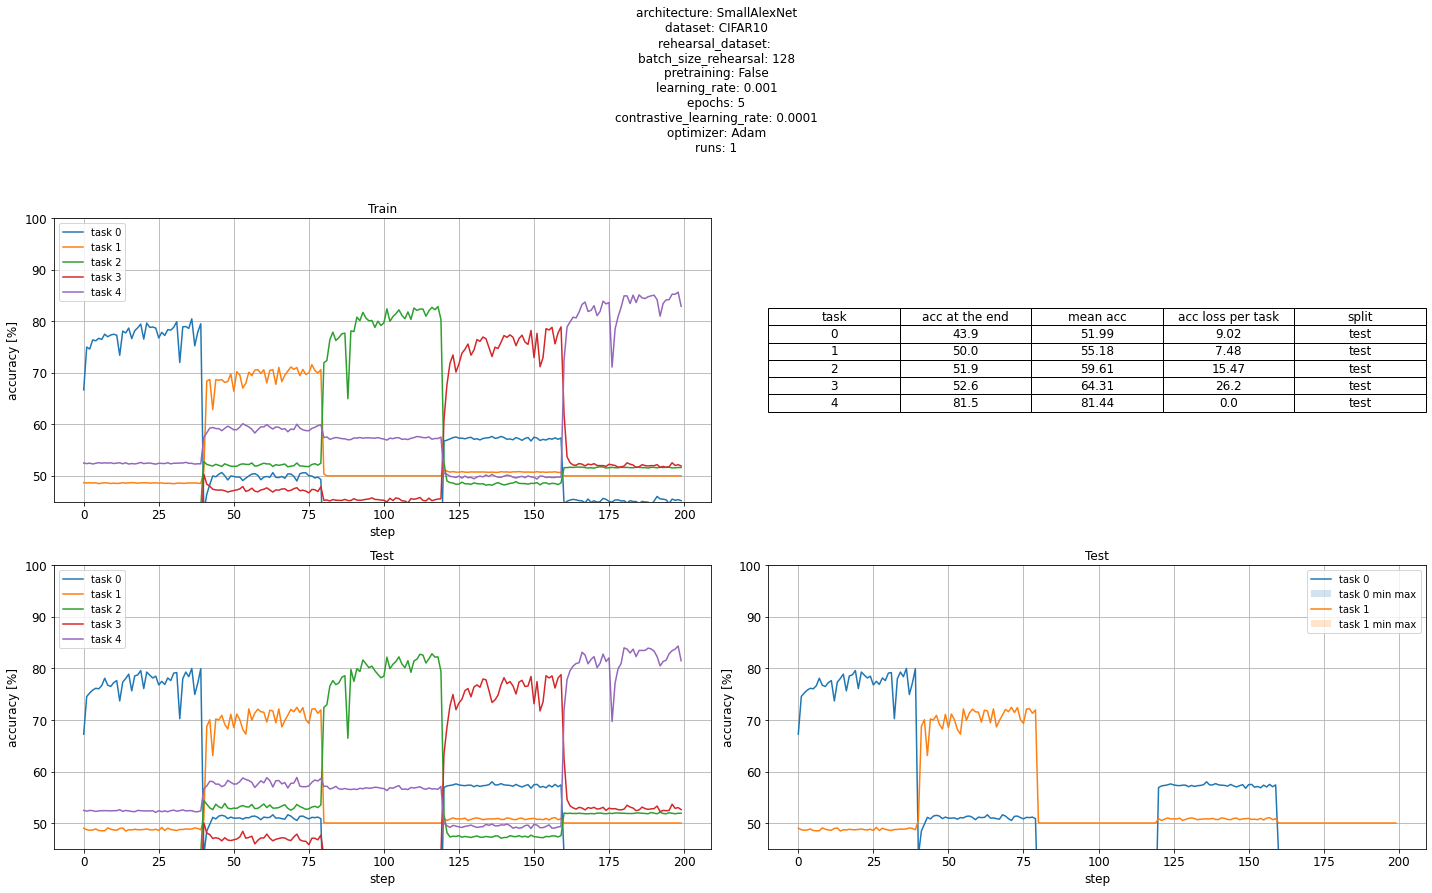

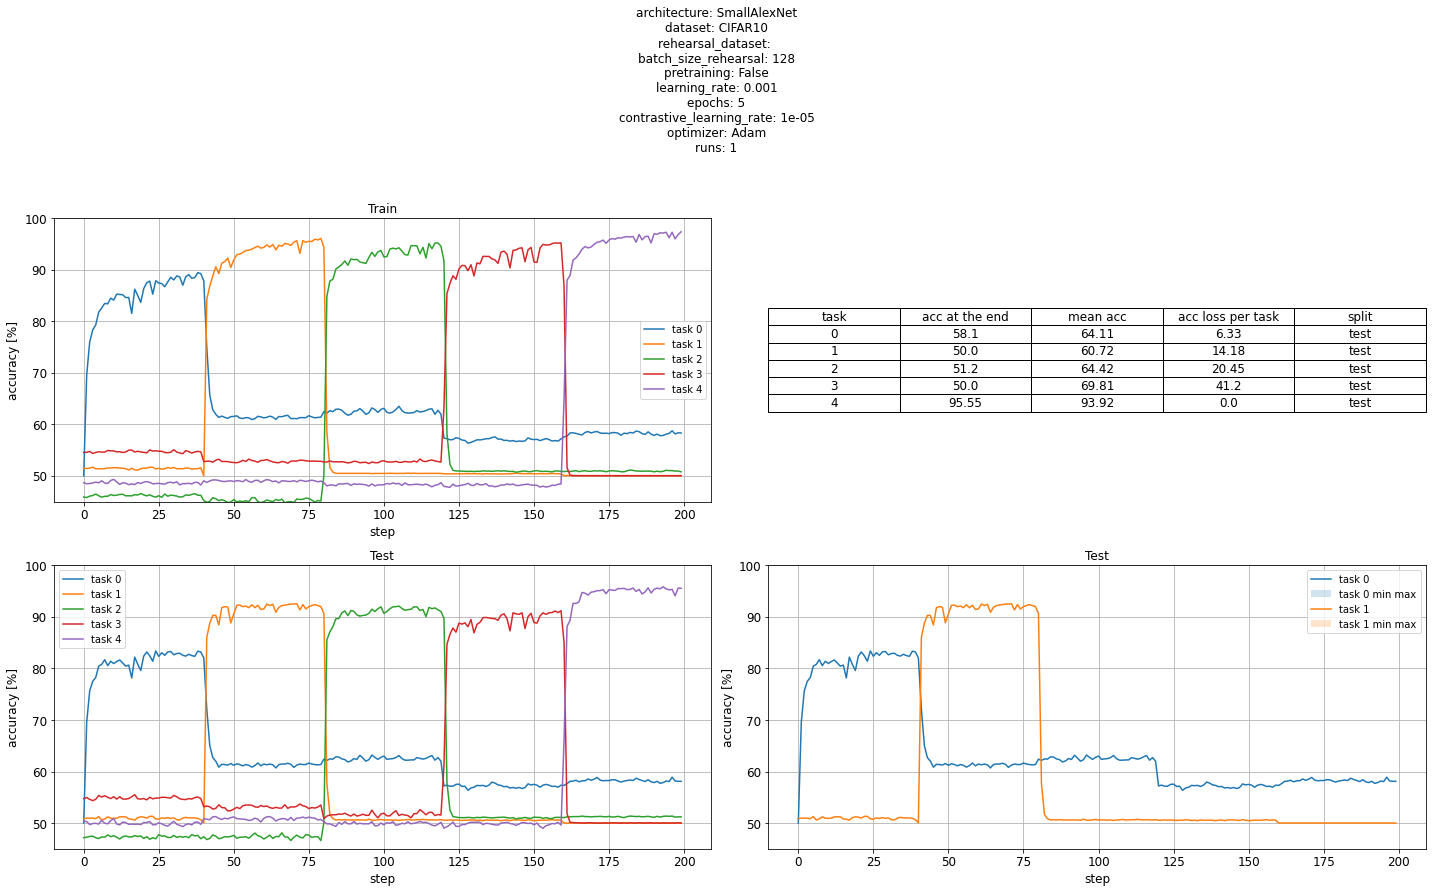

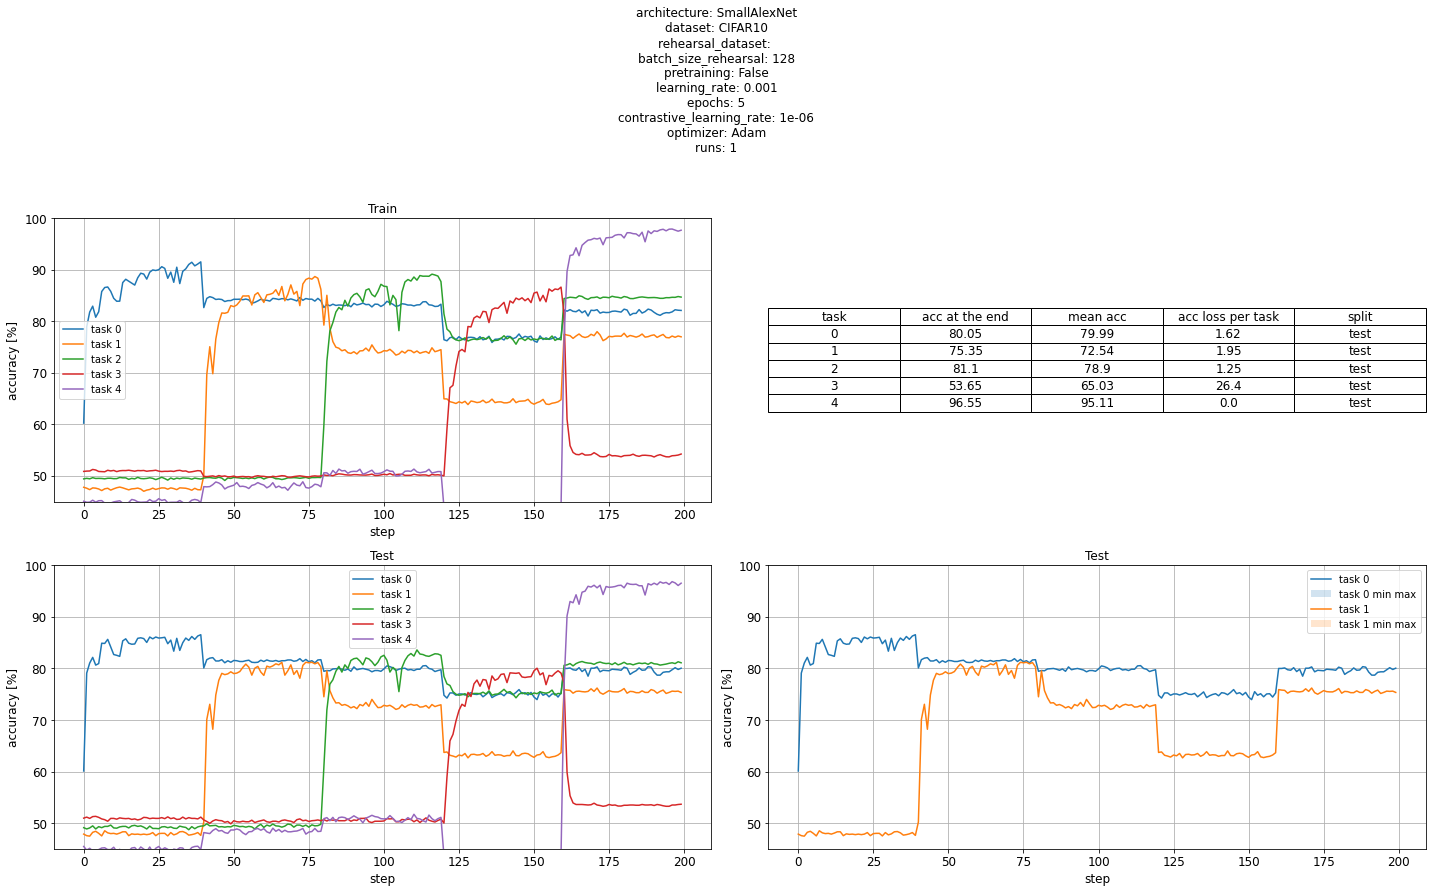

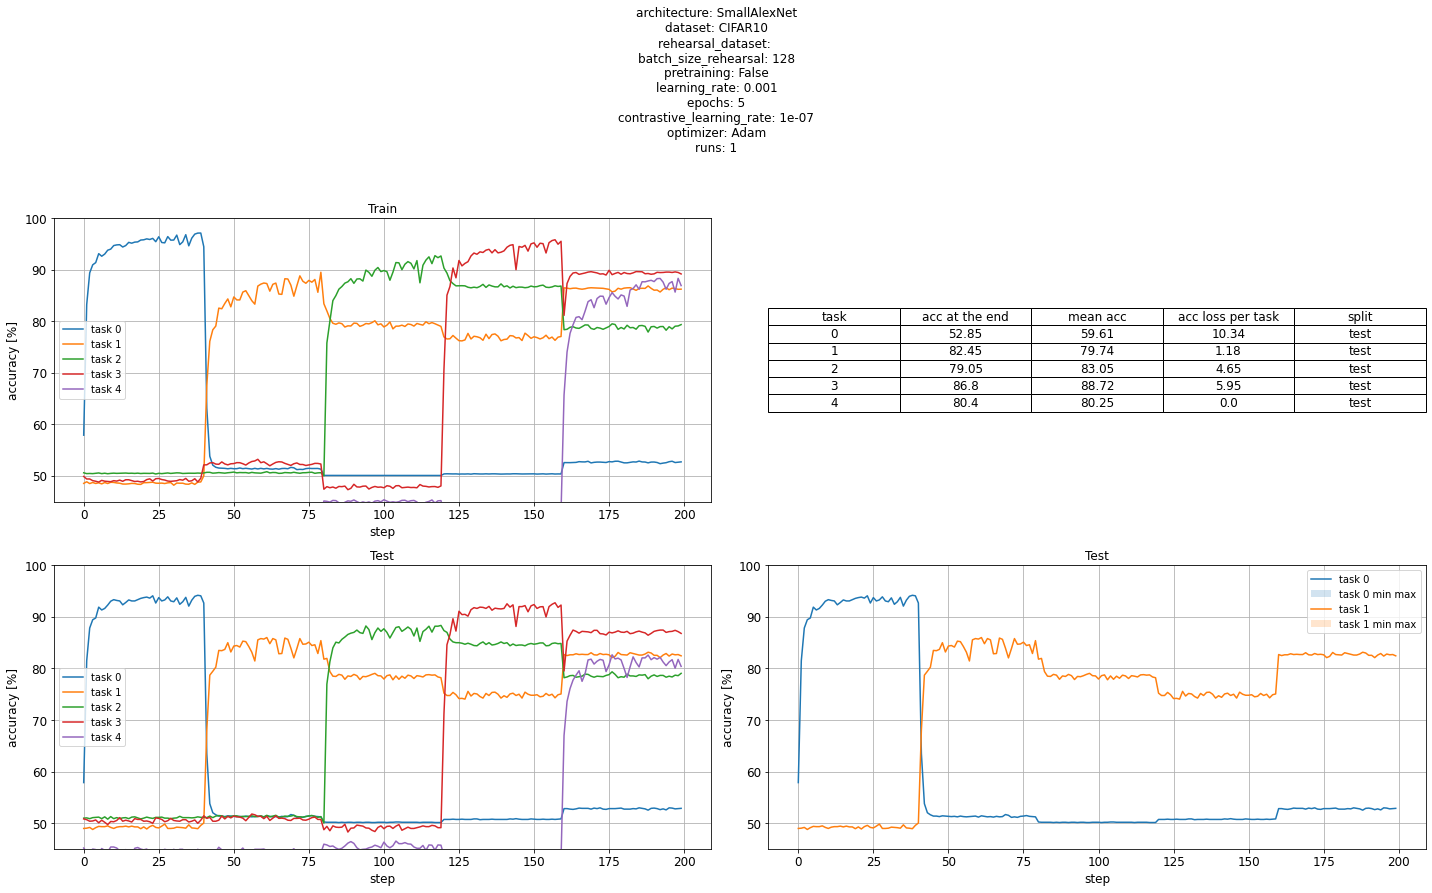

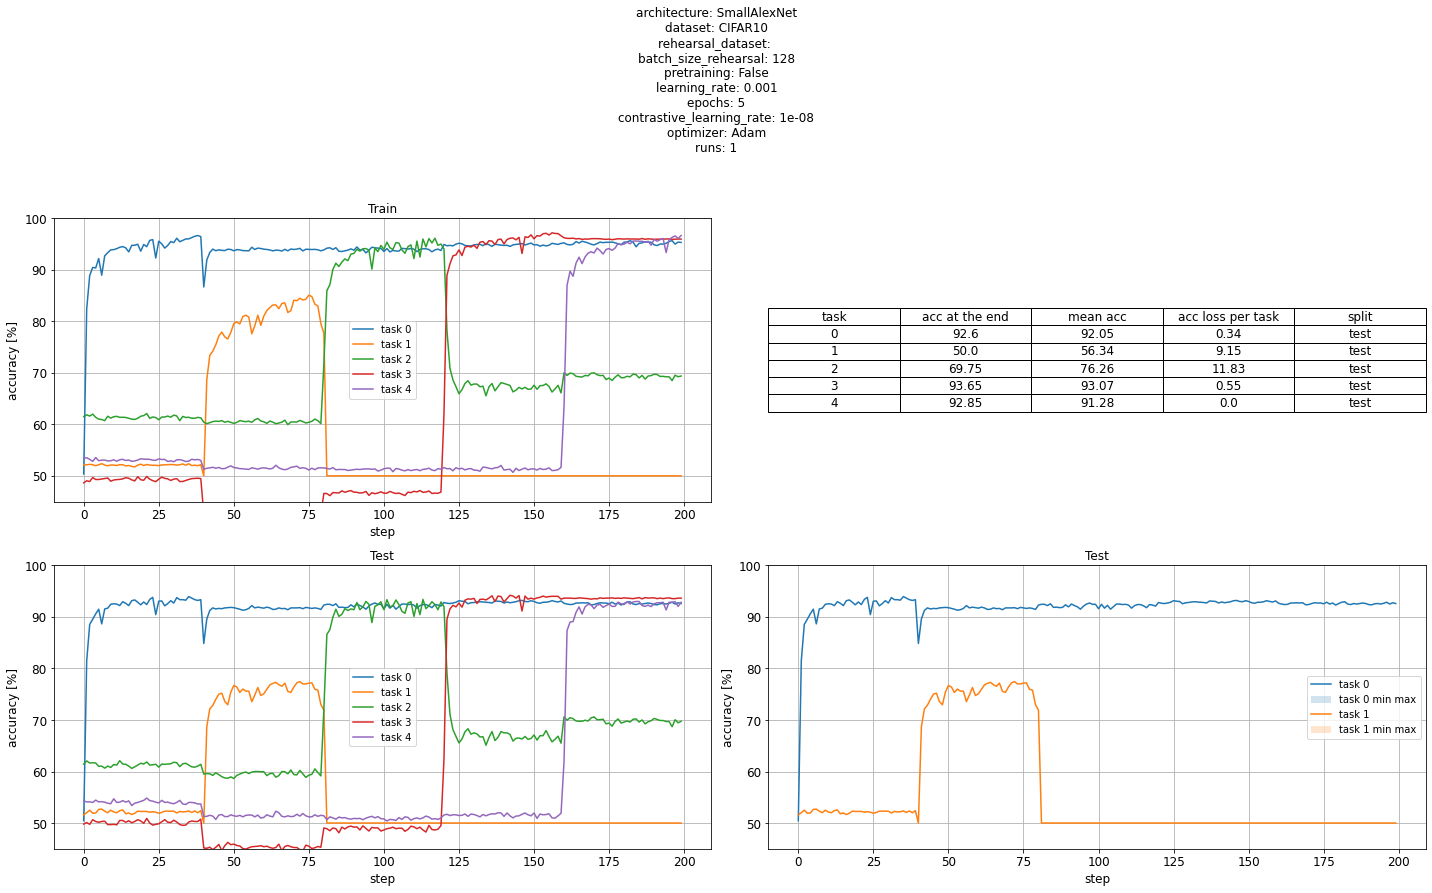

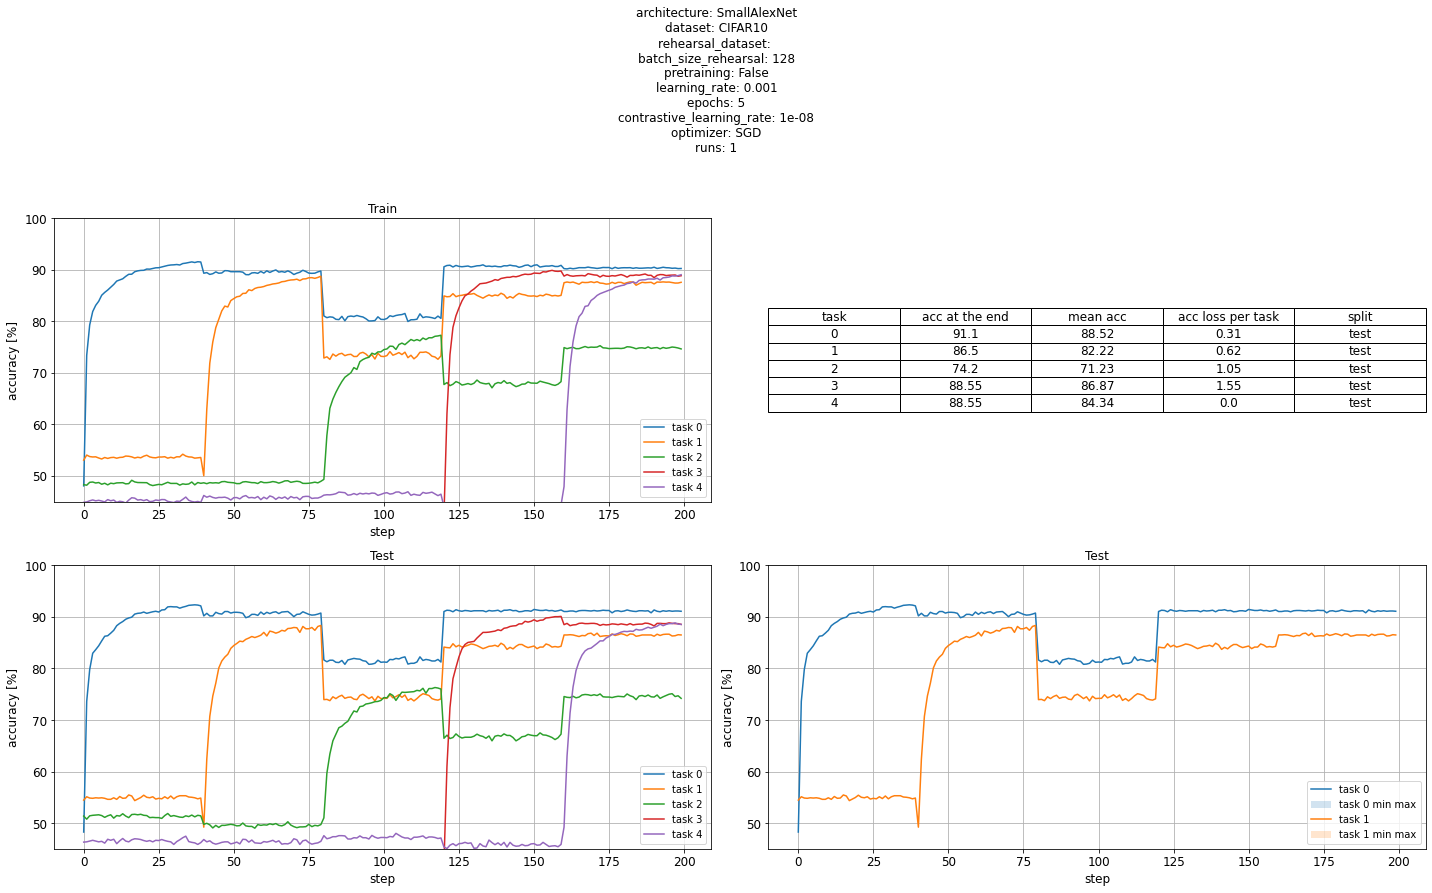

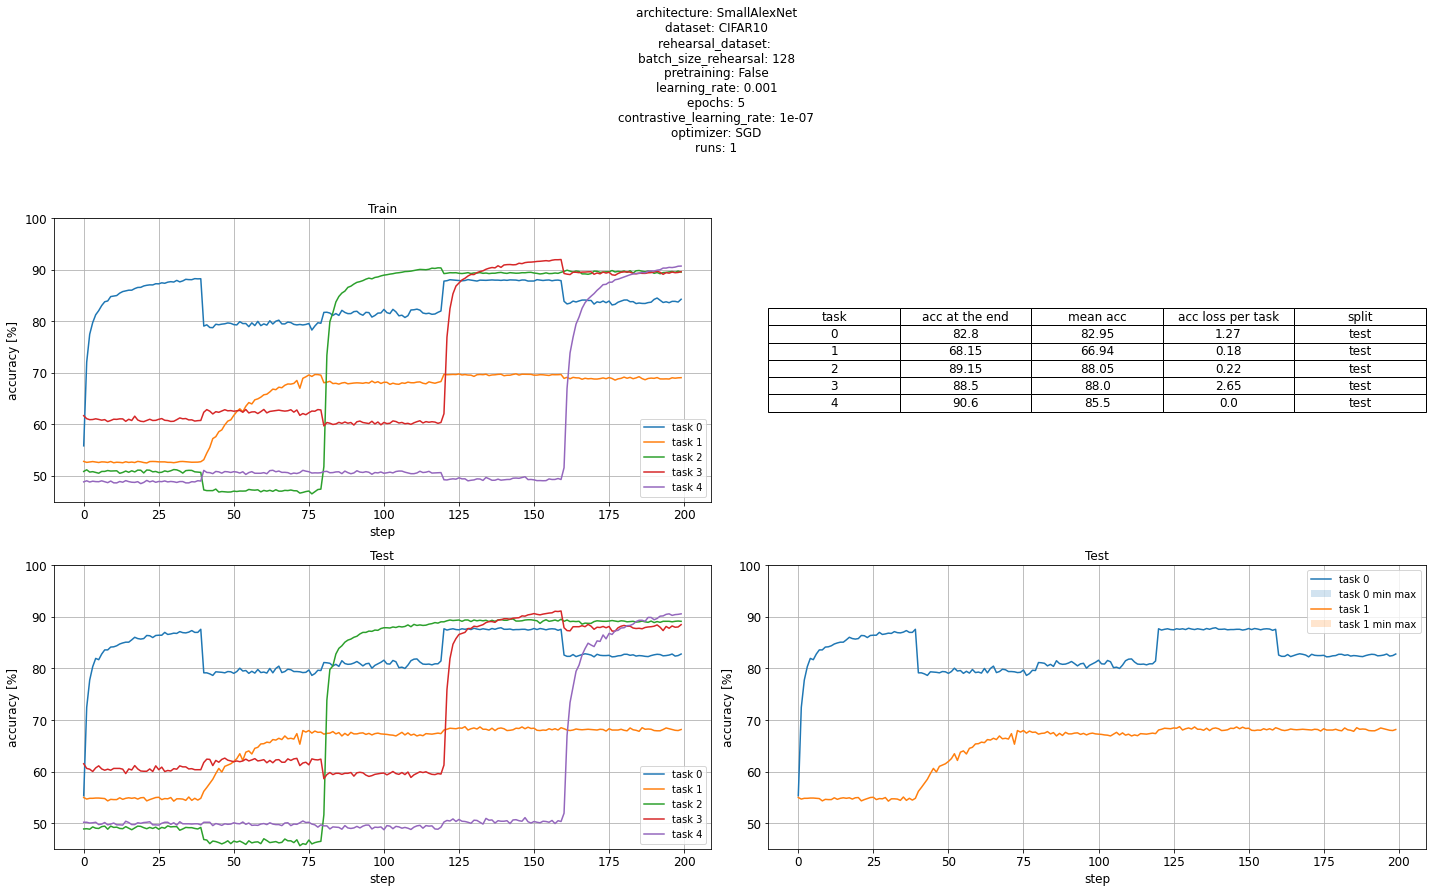

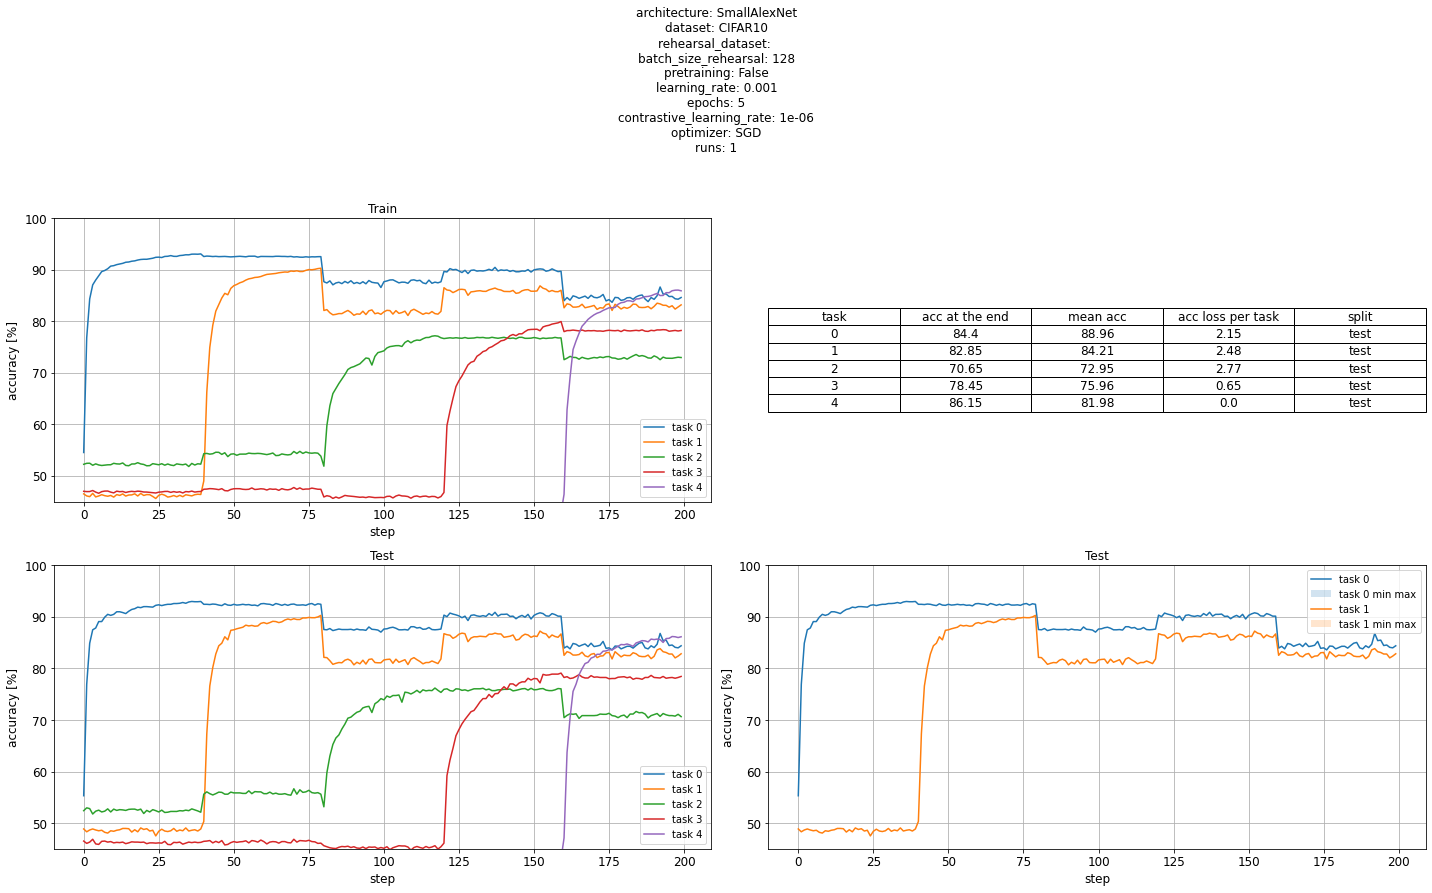

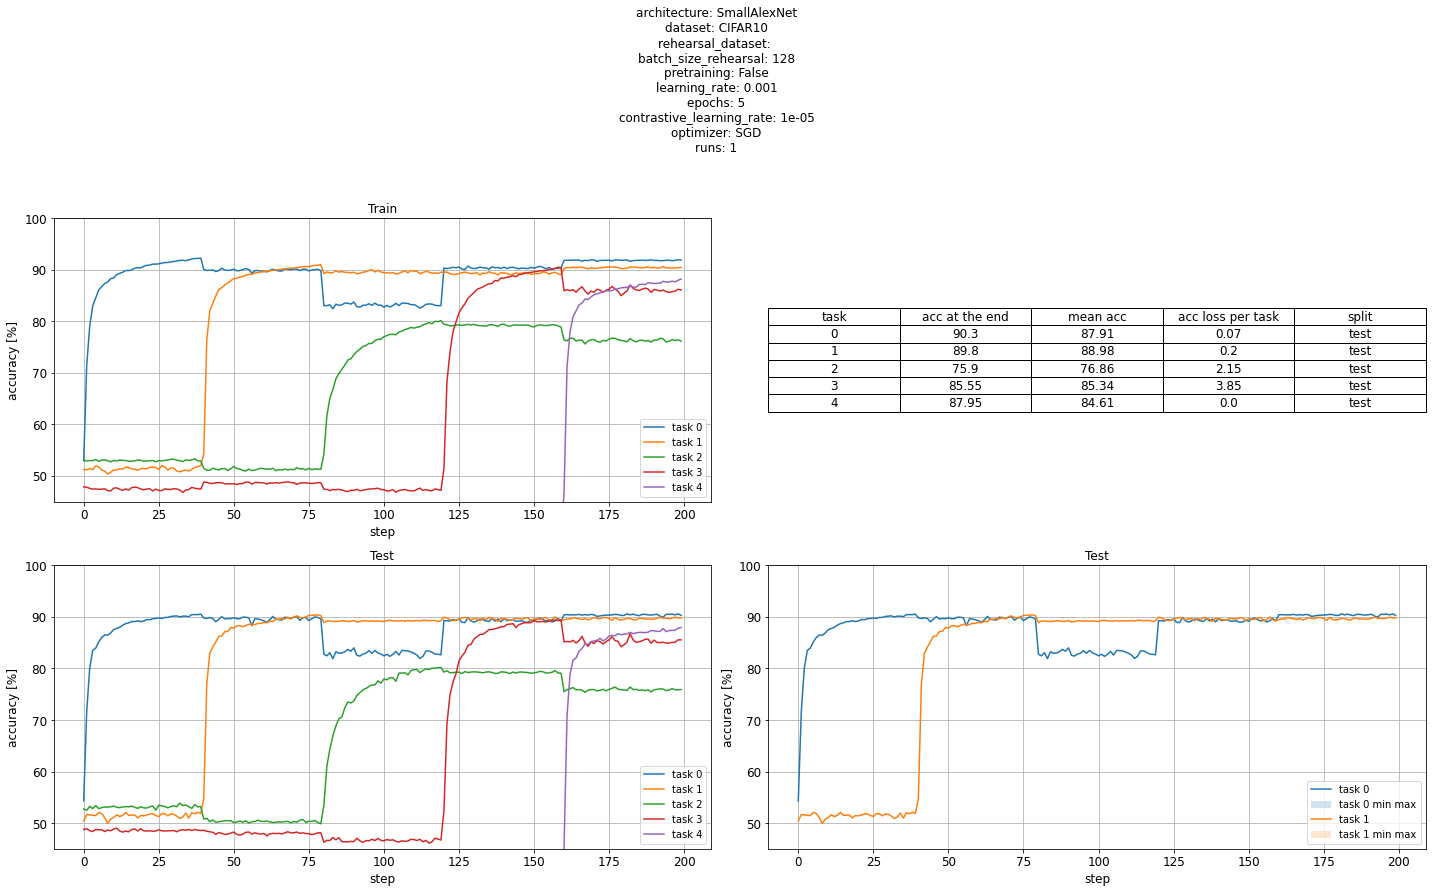

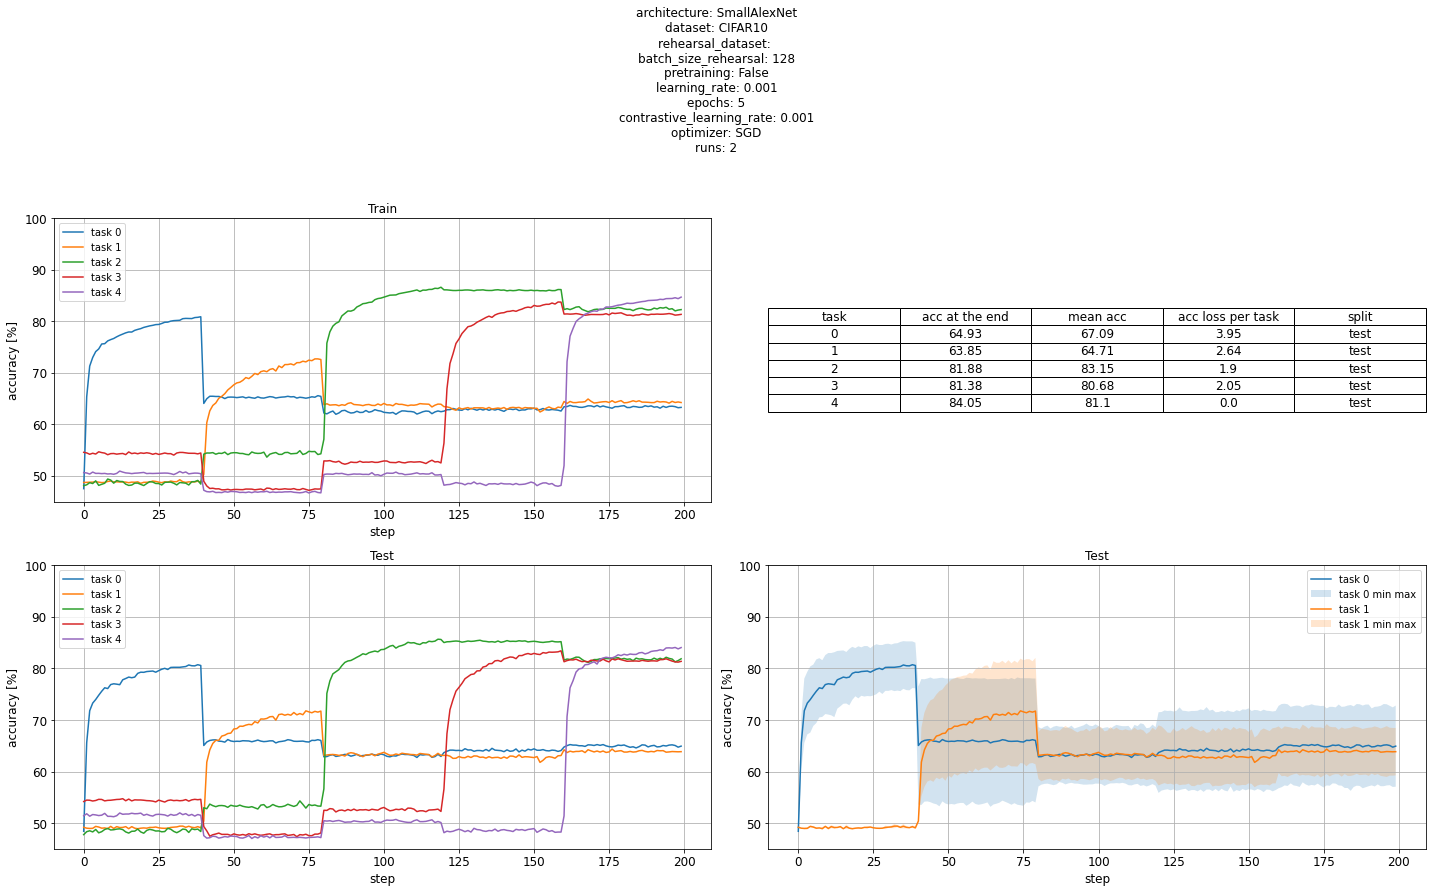

In [6]:
viz.plot_everything()